# SNPs + vertical transmission: Sobol sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [3]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.20],
               [0, 0.20], 
               [0, 0.30]]
}

In [4]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans', 'fertitlity-differential']
    t.to_csv(model_path + "data/param-snp-vt-sobol-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-sobol-test.csv")

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

(20480, 13)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_42369/3320049218.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  iteration_exp  replicate  init_pop fertility_type mating_type  \
0          1              1          1      8000       additive    logistic   
1         10             10          1      8000       additive    logistic   
2        100            100          1      8000       additive    logistic   
3       1000           1000          1      8000       additive    logistic   
4      10000          10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                   0.367065        0.1         0.000732   
1            0.367798                   0.463257        0.1         0.319580   
2            0.211548                   0.057007        0.1         0.257080   
3            0.192017                   0.146851        0.1         0.577393   
4            0.195435                   0.107300        0.1         0.648682   

   p_fertility_factor  
0            0.224048  
1            0.126782  
2            0.033032  
3            0.213501  
4            0.255981

## Proportion obese

                               ST   ST_conf
random-mating            0.217264  0.015145
genetic-variance         0.559402  0.043038
vertical-trans-variance  0.142520  0.011521
fertility-differential   0.230816  0.019493
                               S1   S1_conf
random-mating            0.152795  0.023193
genetic-variance         0.459973  0.044522
vertical-trans-variance  0.103235  0.021368
fertility-differential   0.170783  0.024365
                                                         S2   S2_conf
(random-mating, genetic-variance)                  0.037433  0.038506
(random-mating, vertical-trans-variance)           0.008494  0.033019
(random-mating, fertility-differential)            0.006253  0.033307
(genetic-variance, vertical-trans-variance)        0.016783  0.045611
(genetic-variance, fertility-differential)         0.031190  0.045983
(vertical-trans-variance, fertility-differential)  0.001907  0.031615


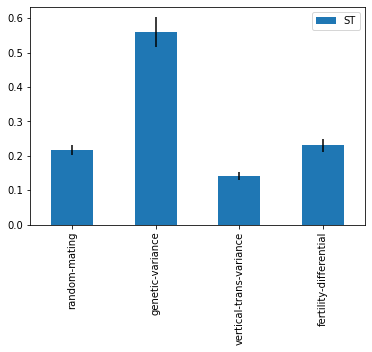

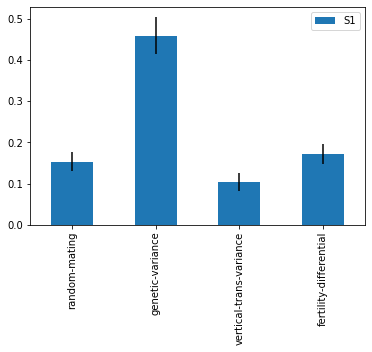

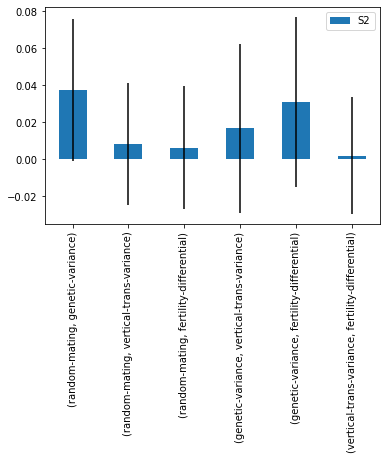

In [6]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                               ST   ST_conf
random-mating            0.206058  0.016101
genetic-variance         0.537472  0.033889
vertical-trans-variance  0.120230  0.008922
fertility-differential   0.269713  0.023921
                               S1   S1_conf
random-mating            0.148040  0.027293
genetic-variance         0.449414  0.038567
vertical-trans-variance  0.087447  0.019831
fertility-differential   0.209305  0.029698
                                                         S2   S2_conf
(random-mating, genetic-variance)                  0.034262  0.036284
(random-mating, vertical-trans-variance)           0.010925  0.039945
(random-mating, fertility-differential)            0.007326  0.039755
(genetic-variance, vertical-trans-variance)        0.013955  0.049433
(genetic-variance, fertility-differential)         0.034217  0.052138
(vertical-trans-variance, fertility-differential)  0.003878  0.029715


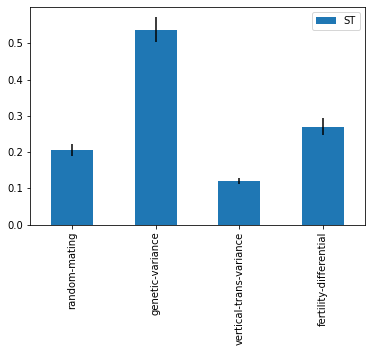

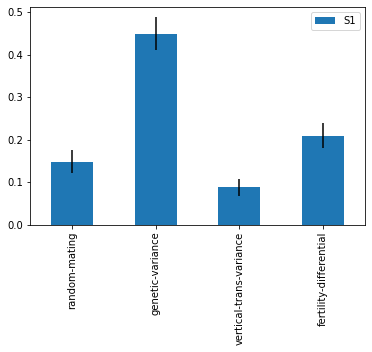

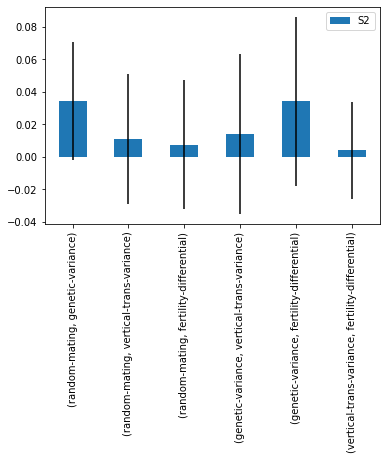

In [7]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                               ST   ST_conf
random-mating            0.279565  0.073728
genetic-variance         0.372754  0.072462
vertical-trans-variance  0.190859  0.035860
fertility-differential   0.936403  0.174563
                               S1   S1_conf
random-mating            0.042523  0.047566
genetic-variance         0.058613  0.030455
vertical-trans-variance -0.007852  0.026664
fertility-differential   0.351630  0.079621
                                                         S2   S2_conf
(random-mating, genetic-variance)                 -0.065534  0.070204
(random-mating, vertical-trans-variance)          -0.038289  0.068389
(random-mating, fertility-differential)            0.102532  0.105385
(genetic-variance, vertical-trans-variance)        0.003033  0.050069
(genetic-variance, fertility-differential)         0.225613  0.145566
(vertical-trans-variance, fertility-differential)  0.097908  0.045644


['sobol-snp-vt.pkl']

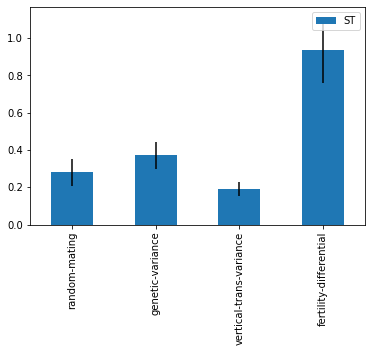

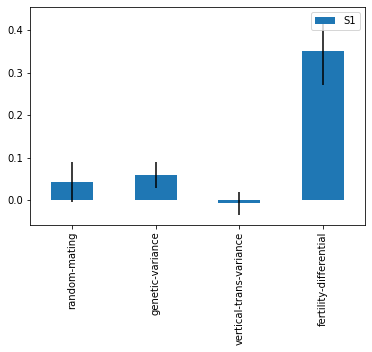

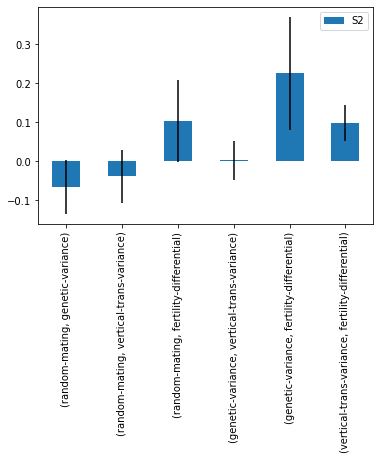

In [8]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp-vt.pkl')